# Decision Tree (classifier) From First Principles

`Đọc về cách tính chay bằng tay thì đọc tài liệu "AI VietNam"`

---

### 1. Tổng quan

- `Entropy` đo mức độ hỗn loạn / không chắc chắn của dữ liệu. `Entropy` càng lớn thì tập dữ liệu càng “không thuần”, càng khó phân tách.

** càng nhỏ càng thuần về 1 lớp

*VD:*

*10 Yes => Entropy = 0*

*5 Yes, 5 No => Entropy = 1*

*8 Yes, 2 No => Entropy = 0.72*

- `Entropy` không dùng trực tiếp để chọn feature, mà dùng qua `Information Gain`. IG càng lớn => chia càng tốt

- `Information Gain` đo mức độ giảm `Entropy` sau khi chia

** Feature nào làm giảm hỗn loạn nhiều nhất => được chọn.

...

- `Gini` đo xác suất phân loại sai nếu chọn nhãn ngẫu nhiên trong node.

** càng nhỏ càng thuần về 1 lớp

*VD:*

*100% 1 class =	0*

*50% - 50%	= 0.5*

*Càng lẫn	Càng cao*

*Gini = 0 => node thuần*


- `Gini Gain` Tương tự IG nhưng dùng `Gini`. Chọn feature làm `Gini` giảm nhiều nhất

**sklearn mặc định dùng Gini**


`Entropy` sau chia - NHỎ NHẤT

`Information Gain` - LỚN NHẤT

`Gini` sau chia	- NHỎ NHẤT

`Gini Gain`	- LỚN NHẤT


#### So sánh Entropy/Information Gain và Gini/Gini Gain

1. Khác:

- `Entropy/Information Gain` sử dụng hàm
log để đo “độ ngạc nhiên” trung bình;
`Gini/Gini Gain` không dùng log, độ phức
tạp tính toán thấp hơn.

- `Entropy` nhạy hơn với các nhãn có tần
suất nhỏ (hiếm); `Gini Impurity` ưu tiên
tạo các node thuần và ít dao động theo
tần suất.

2. Giống:

- Đều đánh giá chất lượng phân tách dựa
trên mức độ “thuần” (Pure) của nhãn.


```
 Đọc về cách tính chay bằng tay thì đọc tài liệu "AI VietNam"
```




---



### 2. Phân tích Khám phá Dữ liệu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car_evaluation.csv', header=None)

In [3]:
df.shape

(1728, 7)

In [4]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Gán cột

In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Kiểm tra dữ liệu có trong các cột

In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


> Cột class dữ liệu khá lệch

In [10]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


---

### 3. Chia dữ liệu và huấn luyện

In [11]:
X = df.drop(['class'], axis=1)
y = df['class']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [14]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


Mã hóa các cột

In [17]:
import category_encoders as ce

In [18]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [20]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [19]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


Huấn luyện

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [25]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

print('Model accuracy score {}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score 0.8021015761821366


So sánh accuracy của tập test và train

In [33]:
y_pred_train = model.predict(X_train)
print('Model accuracy score {}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score 0.7865168539325843


### 4. Trực quan


[Text(0.4, 0.875, 'x[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255.0, 49.0, 181.0, 40.0]'),
 Text(0.2, 0.125, 'gini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'gini = 0.654\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

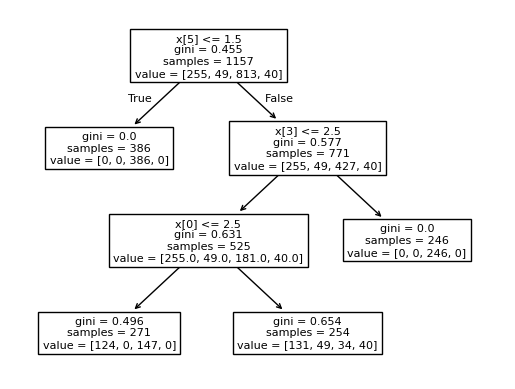

In [36]:
from sklearn import tree

tree.plot_tree(model.fit(X_train, y_train))

Ma trận nhầm lẫn

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]


> class 0: dự đoán đúng là class 0: 73 lần và nhầm thành class 2: 56 lần

> class 1: dự đoán đúng là class 1: 0 lần và nhầm thành class 0:  20 lần

> class 2: dự đoán là đúng là class 2: 385 lần và nhầm thành class 0: 12 lần

> class 3: dự đoán đúng là class 3: 0 lần và nhầm thành class 0: 25 lần

(tính theo cột) 73 + 20 + 12 + 25 = 130 và 56 + 0 + 385 + 0 = 441 => rất hay dự đoán class 0 và 2

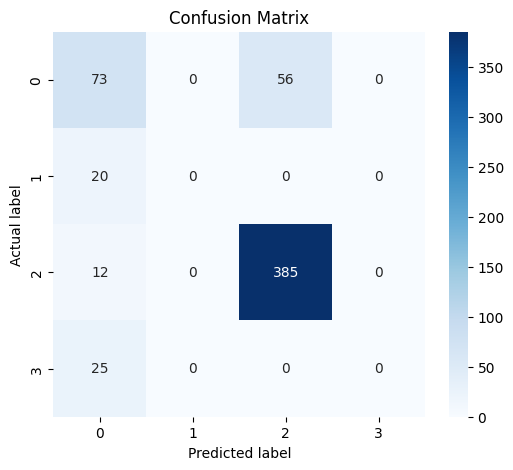

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,        # hiện số trong ô
    fmt="d",           # số nguyên
    cmap="Blues",      # màu xanh dễ nhìn
    xticklabels=[0, 1, 2, 3],
    yticklabels=[0, 1, 2, 3]
)

plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix")
plt.show()


---

### 5. Chọn tham số tối ưu

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10, 20, 50],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [None, "sqrt", "log2"]
}

dt_random = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid,
    scoring="accuracy",
    n_iter=20,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

dt_random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20,
                                                              50]},
                   random_state=42, scoring='accuracy', verbose=1)

In [49]:
dt_random.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': None}

---